# Lecture 28 – Data 100, Fall 2024

Data 100, Fall 2024

[Acknowledgments Page](https://ds100.org/fa24/acks/)

In this demo, we will cover how to invoke LLMs in Python.  Here I will focus on the Google Gemini API, but the code is very similar for other LLMs.


In [1]:
import pandas as pd

## Working with Google Gemini Models

You will need to install Gemini API to use the code below.  You can install these APIs by uncommenting and running the following command:

In [2]:
# !pip install -q -U google-generativeai

You will need to obtain an API key.  Unfortunately, UC Berkeley has not yet enabled access to the Gemini API for Berkeley accounts but you can use any free Google account to obtain an API key.  You can obtain an API key by following the instructions [here](https://makersuite.google.com/app/apikey).

Once you get an API Key you can put it here:

In [3]:
GEMINI_API_KEY = None
if not GEMINI_API_KEY:
    with open("gemini_key.txt", "r") as f:
        GEMINI_API_KEY = f.read().strip()

We can then connect to the Gemini API using the following code:


In [4]:
import google.generativeai as genai
genai.configure(api_key=GEMINI_API_KEY)

models_df = pd.DataFrame(genai.list_models())
models_df.head()

I0000 00:00:1733382179.024609 5694144 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


,name,base_model_id,version,display_name,description,input_token_limit,output_token_limit,supported_generation_methods,temperature,max_temperature,top_p,top_k
0,models/chat-bison-001,,001,PaLM 2 Chat (Legacy),A legacy text-only model optimized for chat co...,4096,1024,"[generateMessage, countMessageTokens]",0.25,NaN,0.95,40.0
1,models/text-bison-001,,001,PaLM 2 (Legacy),A legacy model that understands text and gener...,8196,1024,"[generateText, countTextTokens, createTunedTex...",0.70,NaN,0.95,40.0
2,models/embedding-gecko-001,,001,Embedding Gecko,Obtain a distributed representation of a text.,1024,1,"[embedText, countTextTokens]",NaN,NaN,NaN,NaN
3,models/gemini-1.0-pro-latest,,001,Gemini 1.0 Pro Latest,The original Gemini 1.0 Pro model. This model ...,30720,2048,"[generateContent, countTokens]",0.90,NaN,1.00,NaN
4,models/gemini-1.0-pro,,001,Gemini 1.0 Pro,The best model for scaling across a wide range...,30720,2048,"[generateContent, countTokens]",0.90,NaN,1.00,NaN


We can obtain a model and use it to make a prediction. Here we will use the `"gemini-1.5-flash"` model which is generally pretty good for a wide range of tasks. 
```python

In [5]:
from IPython.display import Markdown
display(Markdown(models_df[models_df["name"] == "models/gemini-1.5-flash"]['description'].values[0]))

Alias that points to the most recent stable version of Gemini 1.5 Flash, our fast and versatile multimodal model for scaling across diverse tasks.

In [6]:
model = genai.GenerativeModel("gemini-1.5-flash")

Use the model to generate text

In [7]:
response = model.generate_content("Why is Data 100 great?")
Markdown(response.text)

I0000 00:00:1733382179.162896 5694144 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


Data 100 (often referring to the course "Data C100: Data Science" at UC Berkeley) is considered great for a number of reasons:

* **Comprehensive Curriculum:** It covers a wide range of essential data science topics, from fundamental programming concepts in Python to statistical modeling, machine learning, and data visualization. This breadth gives students a strong foundation across the field.

* **Practical Application:**  The course emphasizes hands-on projects and problem-solving. Students work with real-world datasets, applying the techniques they learn to analyze and extract insights. This practical experience is crucial for developing practical data science skills.

* **Strong Emphasis on Statistical Thinking:**  Data 100 doesn't just teach the *how* of data science, it emphasizes the *why*.  Students learn to critically assess data, understand statistical significance, and avoid common pitfalls in data analysis. This rigorous approach is essential for producing reliable and meaningful results.

* **Excellent Instructors and Teaching Staff:** The course is known for its dedicated and knowledgeable instructors and teaching assistants, who provide significant support to students.  The course materials are often well-organized and easy to follow.

* **High Quality Resources:** Data 100 typically provides excellent learning resources, including well-structured lectures, detailed notes, and comprehensive lab assignments.  These resources allow students to learn at their own pace and delve deeper into specific topics.

* **Project-Based Learning:**  The project-based approach helps students to synthesize their knowledge and apply it to complex problems.  This experience is invaluable for building a strong portfolio and demonstrating competency to potential employers.

* **Community and Collaboration:** The large student body often fosters a strong sense of community and collaboration, enabling students to learn from each other and build professional connections.


However, it's important to note that the "greatness" of Data 100 is subjective and depends on individual learning styles and goals.  While it offers a strong foundation, it's a challenging course that requires significant time commitment and dedication.  Some students might find certain aspects challenging, particularly those with limited prior programming experience or statistical background.


Working with images

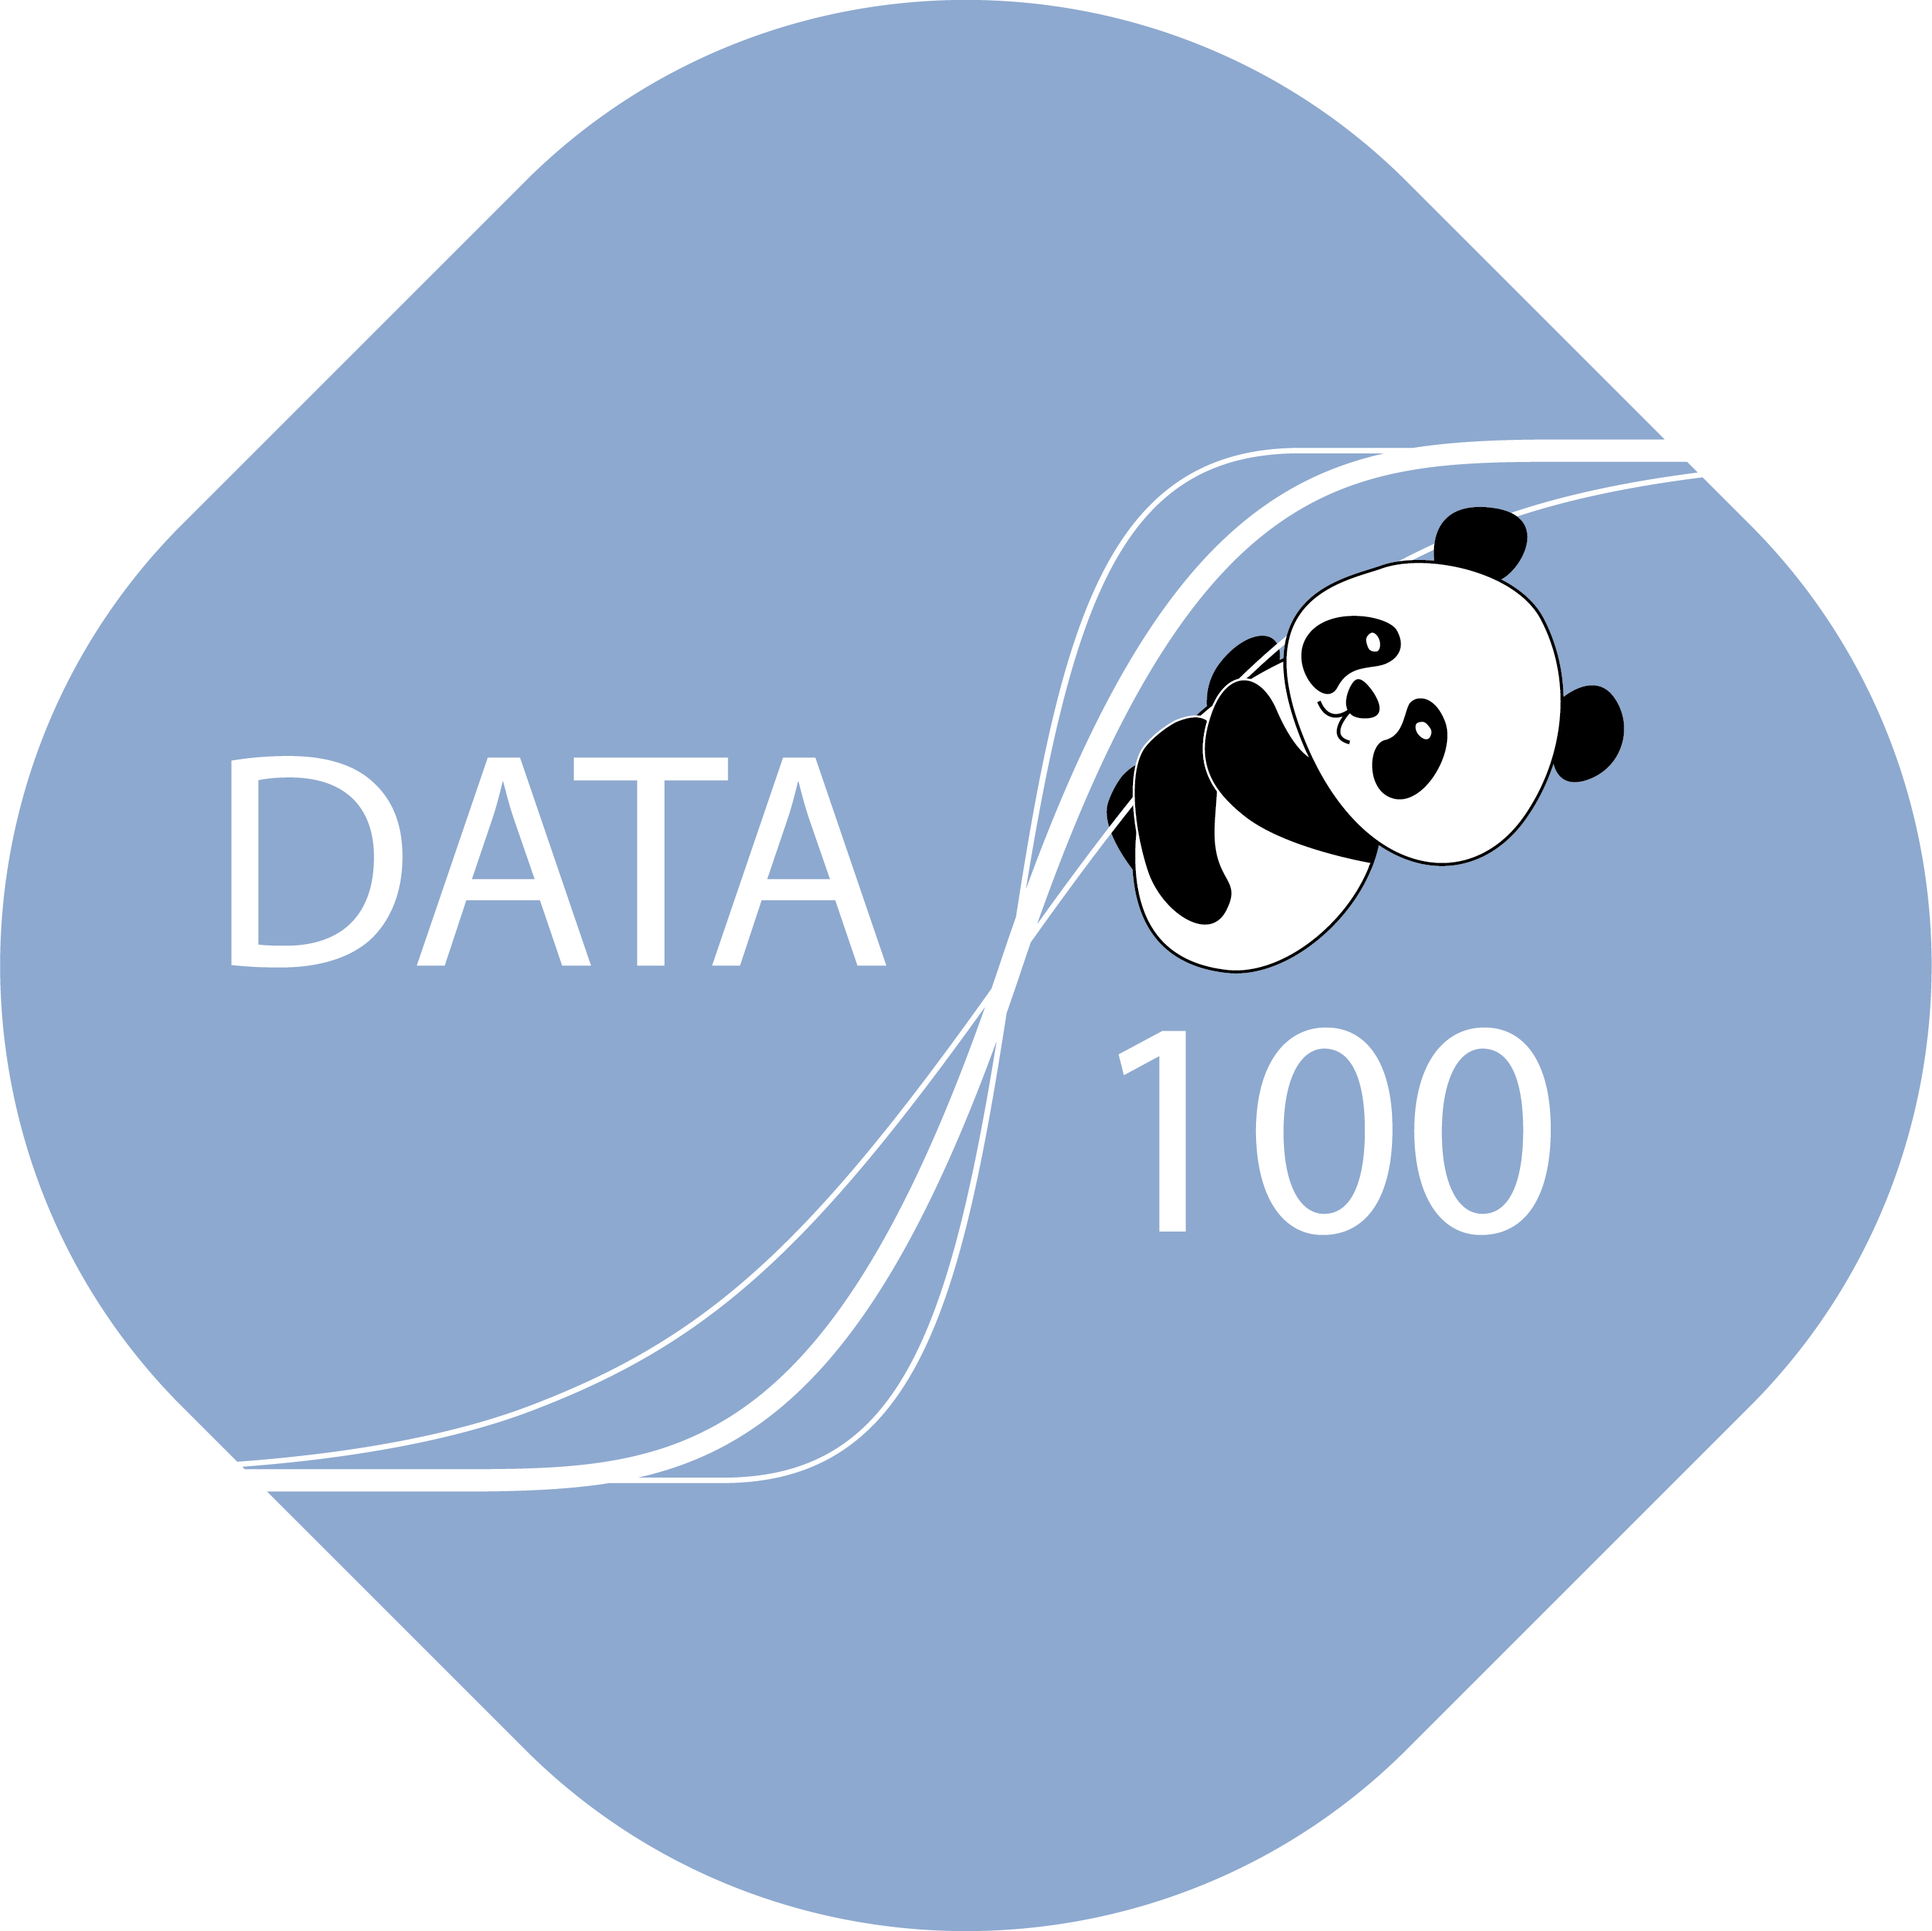

In [8]:
from IPython.display import Image
from IPython.core.display import HTML
img = Image("data100_logo.png", width=200, height=200)
img

In [9]:
response = model.generate_content([
    """What is going on in this picture I downloaded from 
    the Berkeley Data100 Course Website? 
    How does it related to Data Science""", img])
Markdown(response.text)

That's the logo for Data100, an introductory data science course offered by the University of California, Berkeley.

Here's what's going on:

* **"DATA 100":** This is the name of the course.  It clearly indicates the subject matter (Data) and the course number (100).

* **The Panda:** The panda is a playful mascot for the course. Pandas are known for their gentle nature and are often used to represent something cute or approachable.  This makes the logo more memorable and engaging.

* **The Curve:** The white curve behind the panda likely represents a data visualization, specifically a curve showing some sort of trend in data.  This subtle visual connects the course's subject matter directly to the visual element. The curve's shape also suggests growth or progress, fitting with the idea of learning in a course.


**How it relates to Data Science:**

The logo effectively summarizes the essence of the Data100 course in a visually appealing way. The combination of the course name, the data-related curve, and the friendly panda conveys the core aspects of the course:

* **Data:** The central focus of the course is data analysis and manipulation.
* **Introduction (100-level):** This is a foundational or introductory course.
* **Fun and engaging:** The panda gives it a friendly face, suggesting that data science can be approached in a fun and accessible manner.
* **Visual analysis:** The curve serves as a visual reminder of the important role data visualization plays in understanding and communicating data insights.

In short, the logo acts as a memorable and effective branding for a Data Science course, appealing to its target audience (students) by linking a friendly symbol with core concepts of data science.


You can stream content back which could be useful for interacting with the model.

In [10]:
from IPython.display import clear_output

response = model.generate_content("Write a poem about Data Science.", stream=True)

output = ""
for chunk in response:
    output += chunk.text
    clear_output(wait=True)
    display(Markdown(output))


The data whispers, a silent stream,
A torrent vast, a digital dream.
From sensor hum to keyboard's click,
A universe of numbers, quick, quick, quick.

The scientist gazes, with keenest eye,
Unraveling patterns, beneath the sky
Of scatter plots, and histograms tall,
Where hidden truths begin to enthrall.

With Python's grace, and R's sharp might,
They cleanse and shape, with all their light.
Regression lines, a gentle hand,
Predicting futures, across the land.

Machine learning's hum, a tireless drone,
Building models, on seeds they've sown.
Neural networks, a tangled weave,
Complex solutions, they believe.

But biases lurk, in shadows deep,
Where faulty data, secrets keep.
The ethical compass, must guide the way,
To ensure fairness, come what may.

For data science, a power untold,
A tapestry woven, brave and bold.
To understand the world, its pulse and flow,
And where its future seeds will grow.


## Using Gen AI for EDA

We could use the model to help analyze our data.

In [11]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_colleges_and_universities_in_California")[1]
df

,Name,City,County,Enrollment[1] Fall 2022,Founded,Athletics
0,"University of California, Berkeley",Berkeley,Alameda,45307,1869,"NCAA Div. I (ACC, MPSF, America East)"
1,"University of California, Davis",Davis,Yolo,39679,1905,"NCAA Div. I (Big Sky, MPSF, Big West, America ..."
2,"University of California, Irvine",Irvine,Orange,35937,1965,"NCAA Div. I (Big West, MPSF, GCC)"
3,"University of California, Los Angeles",Los Angeles,Los Angeles,46430,1882*,"NCAA Div. I (Big Ten, MPSF)"
4,"University of California, Merced",Merced,Merced,9103,2005,NAIA (Cal Pac)
5,"University of California, Riverside",Riverside,Riverside,26809,1954,NCAA Div. I (Big West)
6,"University of California, San Diego",San Diego,San Diego,42006,1960,"NCAA Div. I (Big West, MPSF)"
7,"University of California, Santa Barbara",Santa Barbara,Santa Barbara,26420,1891**,"NCAA Div. I (Big West, MPSF, GCC)"
8,"University of California, Santa Cruz",Santa Cruz,Santa Cruz,19478,1965,"NCAA Div. III (C2C, ASC)"


In [12]:
fast_model = genai.GenerativeModel("gemini-1.5-flash-8b")

In [ ]:
prompt = "What is the mascot of {school}? Answer by only providing the mascot."
df['mascot'] = df['Name'].apply(
    lambda x: fast_model.generate_content(prompt.format(school=x)).text.strip())
df

,Name,City,County,Enrollment[1] Fall 2022,Founded,Athletics,mascot
0,"University of California, Berkeley",Berkeley,Alameda,45307,1869,"NCAA Div. I (ACC, MPSF, America East)",Golden Bear\n
1,"University of California, Davis",Davis,Yolo,39679,1905,"NCAA Div. I (Big Sky, MPSF, Big West, America ...",Aggie\n
2,"University of California, Irvine",Irvine,Orange,35937,1965,"NCAA Div. I (Big West, MPSF, GCC)",Anteater\n
3,"University of California, Los Angeles",Los Angeles,Los Angeles,46430,1882*,"NCAA Div. I (Big Ten, MPSF)",Bruin\n
4,"University of California, Merced",Merced,Merced,9103,2005,NAIA (Cal Pac),Merced Bear\n
5,"University of California, Riverside",Riverside,Riverside,26809,1954,NCAA Div. I (Big West),The Big Red\n
6,"University of California, San Diego",San Diego,San Diego,42006,1960,"NCAA Div. I (Big West, MPSF)",Triton\n
7,"University of California, Santa Barbara",Santa Barbara,Santa Barbara,26420,1891**,"NCAA Div. I (Big West, MPSF, GCC)",Gaucho\n
8,"University of California, Santa Cruz",Santa Cruz,Santa Cruz,19478,1965,"NCAA Div. III (C2C, ASC)",Banana Slug\n


# Open AI

In [14]:
# Open AI
from openai import OpenAI
client = OpenAI()

In [15]:
# Simulating student feedback data
feedback_data = {
    'StudentID': [1, 2, 3, 4, 5],
    'Feedback': [
        'Great class, learned a lot! But I really did not like PCA.',
        'The course was very informative and well-structured. Would prefer if lectures went faster. ',
        'I found the assignments challenging but rewarding. But the midterm was brutal.',
        'The lectures were engaging and the instructor was very knowledgeable.',
        'I struggled with the linear algebra. I would recommend this class to anyone interested in data science.'
    ],
    'Rating': [5, 4, 4, 5, 5]
}
feedback_df = pd.DataFrame(feedback_data)
feedback_df

,StudentID,Feedback,Rating
0,1,"Great class, learned a lot! But I really did n...",5
1,2,The course was very informative and well-struc...,4
2,3,I found the assignments challenging but reward...,4
3,4,The lectures were engaging and the instructor ...,5
4,5,I struggled with the linear algebra. I would r...,5


In [16]:

output_schema = {
        "type": "json_schema",
        "json_schema": {
            "name": "issue_schema",
            "schema": {
                "type": "object",
                "properties": {
                    "Issue": {
                        "description": "Any issues or concerns the user raised about the class.",
                        "type": "string"
                    },
                    "Liked": {
                        "description": "Any things the user liked about the class.",
                        "type": "string"
                    },
                    "additionalProperties": False
                }
            }
        }
    }

def process_feedback(feedback):
    import json
    messages = [
        {
            "role": "system", 
            "content": """You extract information from a review into JSON data."""
        },
        {
            "role": "user", 
            "content": f"{feedback}"
        }
    ]
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        response_format=output_schema
    )
    return json.loads(response.choices[0].message.content)


In [17]:
responses = feedback_df["Feedback"].apply(process_feedback)
responses

0    {'Liked': 'Great class, learned a lot!', 'Issu...
1    {'Liked': 'The course was very informative and...
2    {'Liked': 'The assignments were challenging bu...
3    {'Liked': 'The lectures were engaging and the ...
4    {'Liked': 'I would recommend this class to any...
Name: Feedback, dtype: object

In [18]:
pd.set_option('display.max_colwidth', None)
feedback_df.join(pd.DataFrame(responses.to_list()))

,StudentID,Feedback,Rating,Liked,Issue
0,1,"Great class, learned a lot! But I really did not like PCA.",5,"Great class, learned a lot!",Did not like PCA.
1,2,The course was very informative and well-structured. Would prefer if lectures went faster.,4,The course was very informative and well-structured.,Would prefer if lectures went faster.
2,3,I found the assignments challenging but rewarding. But the midterm was brutal.,4,The assignments were challenging but rewarding.,The midterm was brutal.
3,4,The lectures were engaging and the instructor was very knowledgeable.,5,The lectures were engaging and the instructor was very knowledgeable.,
4,5,I struggled with the linear algebra. I would recommend this class to anyone interested in data science.,5,I would recommend this class to anyone interested in data science.,I struggled with the linear algebra.
